# Exercise 2 - Implementing Minimum Edit distance via Python

In [1]:
def min_edit_distance(str1, str2):
    m, n = len(str1), len(str2)
    dp = [[0 for _ in range(n + 1)] for _ in range(m + 1)]

    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0:
                dp[i][j] = j
            elif j == 0:
                dp[i][j] = i
            elif str1[i - 1] == str2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = 1 + min(dp[i][j - 1],
                                   dp[i - 1][j],
                                   dp[i - 1][j - 1])

    return dp[m][n]


print(min_edit_distance("Sitting", "Kitten"))
print(min_edit_distance("Intention", "Execution"))
print(min_edit_distance("Honda", "Hyundai"))
print(min_edit_distance("Sunrise", "Sunset"))


3
5
3
3


In [2]:
# Function for minimum edit distance
def min_edit_distance(str1, str2):
    m, n = len(str1), len(str2)
    dp = [[0 for _ in range(n + 1)] for _ in range(m + 1)]

    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0:
                dp[i][j] = j
            elif j == 0:
                dp[i][j] = i
            elif str1[i - 1] == str2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = 1 + min(dp[i][j - 1], dp[i - 1][j], dp[i - 1][j - 1])

    return dp[m][n]

# Test cases
print("Rochester vs. Portchester:", min_edit_distance("Rochester", "Portchester"))
print("Deadline vs. Breadline:", min_edit_distance("Deadline", "Breadline"))
print("Reversal vs. Referral:", min_edit_distance("Reversal", "Referral"))
print("Levenshtein vs. Frankenstein:", min_edit_distance("Levenshtein", "Frankenstein"))


Rochester vs. Portchester: 3
Deadline vs. Breadline: 2
Reversal vs. Referral: 2
Levenshtein vs. Frankenstein: 6


In [8]:
from google.colab import files
uploaded = files.upload()


Saving American-English.tsv to American-English.tsv


In [9]:
import pandas as pd
import io

# Since uploaded files are stored in-memory, we access it via the key in 'uploaded'
data = pd.read_csv(io.BytesIO(uploaded['American-English.tsv']), sep='\t', header=None)
print(data.head())


   0                                                  1
0  1  There is no one more suitable to determine how...
1  2  Peter Vallone yesterday stepped on the acceler...
2  3  ROBERT BOYETT, who made his fortune over the l...
3  4  COOPERSTOWN, N.Y. — Reggie Jackson was nearly ...
4  5  After having made 120 solid chocolate ice hock...


# Excerise 3 - Extracting n-grams and plotting most frequent n-grams

In [16]:
# Installing and Loading Libraries, Loading Data
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.util import ngrams
from collections import Counter

# Download stopwords from NLTK
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load the dataset (assuming the file is uploaded)
data = pd.read_csv('American-English.tsv', sep='\t', header=None)

# Extract the sentences from the second column
sentences = data[1].tolist()

# Display first few sentences to confirm the data
print(sentences[:5])  # Output first 5 sentences


['There is no one more suitable to determine how good a quarterback is than the guys who line up against him on Sundays.', 'Peter Vallone yesterday stepped on the accelerator of his campaign, stumping with singer Tony Bennett, making a surprise appearance with the teachers-union boss, and taking the wraps off a new commercial smacking his opponents.', 'ROBERT BOYETT, who made his fortune over the last three decades producing some of television’s most successful sitcoms, has gone to contract on his spacious apartment in the Sherry-Netherland Hotel. Boyett, whose credits include “Happy Days”...', 'COOPERSTOWN, N.Y. — Reggie Jackson was nearly 3,000 miles away, embedded with the Yankees in Oakland, Calif. But even in absentia, Mr. October was the elephant in the middle of town yesterday as baseball royalty gathered for tomorrow’s induction of Reds shortstop Barry Larkin and Cubs third baseman Ron Santo into the Baseball Hall of Fame.', "After having made 120 solid chocolate ice hockey pla

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# Extract Bigrams and Count Occurrences

def get_bigrams(sentences):
    all_bigrams = []
    for sentence in sentences:
        tokens = sentence.split()  # Tokenize the sentence
        bigrams = list(ngrams(tokens, 2))  # Generate bigrams
        all_bigrams.extend(bigrams)  # Add bigrams to the list
    return all_bigrams

# Get all bigrams from the dataset
all_bigrams = get_bigrams(sentences)

# Count the frequency of each bigram
bigram_counts = Counter(all_bigrams)

# Display the 5 most common bigrams with counts
print(bigram_counts.most_common(5))


[(('of', 'the'), 231), (('in', 'the'), 224), (('on', 'the'), 99), (('in', 'a'), 88), (('to', 'the'), 87)]


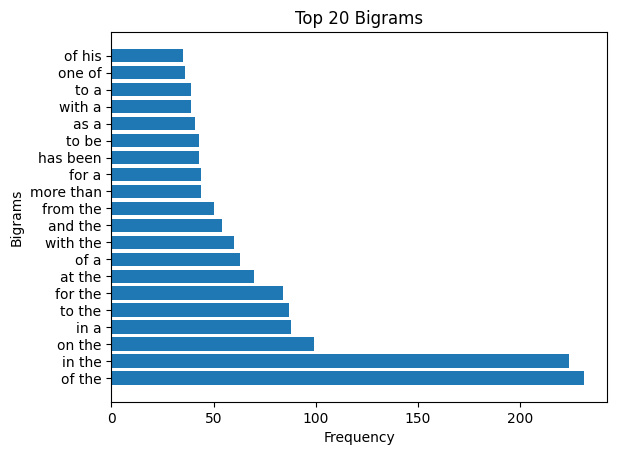

In [18]:
# Extract the top-20 bigrams
top_20_bigrams = bigram_counts.most_common(20)

# Extract bigram labels and counts for plotting
bigram_labels, counts = zip(*top_20_bigrams)
bigram_labels = [' '.join(bigram) for bigram in bigram_labels]  # Format for display

# Plot the top 20 bigrams
plt.barh(bigram_labels, counts)
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Top 20 Bigrams')
plt.show()


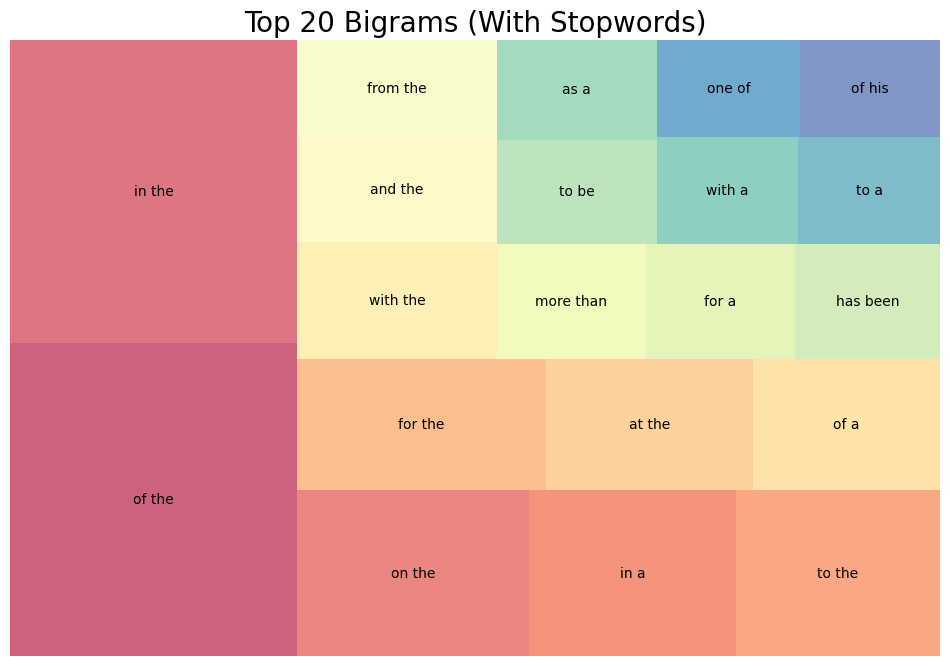

In [25]:


import squarify  # Import the squarify library for treemaps

# Prepare the labels and sizes for the treemap
bigram_labels, counts = zip(*top_20_bigrams)
bigram_labels = [' '.join(bigram) for bigram in bigram_labels]

# Create the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=counts, label=bigram_labels, alpha=0.7, color=sns.color_palette('Spectral', len(bigram_labels)))

# Add title and remove axis for cleaner look
plt.title('Top 20 Bigrams (With Stopwords)', fontsize=20)
plt.axis('off')

# Show the plot
plt.show()



In [19]:
# Removing Stopwords and Extracting Bigrams
stop_words = set(stopwords.words('english'))

# Function to extract bigrams without stopwords
def get_bigrams_no_stopwords(sentences):
    all_bigrams = []
    for sentence in sentences:
        # Remove stopwords from tokens
        tokens = [word for word in sentence.split() if word.lower() not in stop_words]
        bigrams = list(ngrams(tokens, 2))
        all_bigrams.extend(bigrams)
    return all_bigrams

# Get bigrams without stopwords
all_bigrams_no_stopwords = get_bigrams_no_stopwords(sentences)

# Count the frequency of bigrams without stopwords
bigram_counts_no_stopwords = Counter(all_bigrams_no_stopwords)

# Display the 5 most common bigrams without stopwords
print(bigram_counts_no_stopwords.most_common(5))


[(('New', 'York'), 25), (('Donald', 'Trump'), 15), (('United', 'States'), 13), (('Supreme', 'Court'), 12), (('President', 'Donald'), 12)]


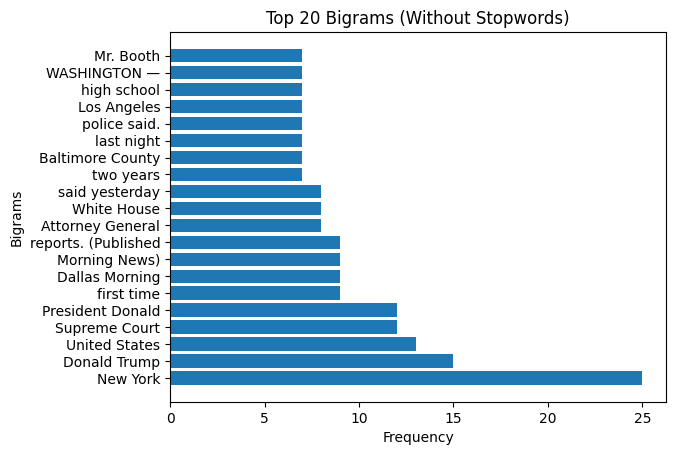

In [20]:
# Extract the top-20 bigrams without stopwords
top_20_bigrams_no_stopwords = bigram_counts_no_stopwords.most_common(20)

# Extract bigram labels and counts for plotting
bigram_labels_no_stopwords, counts_no_stopwords = zip(*top_20_bigrams_no_stopwords)
bigram_labels_no_stopwords = [' '.join(bigram) for bigram in bigram_labels_no_stopwords]

# Plot the top 20 bigrams without stopwords
plt.barh(bigram_labels_no_stopwords, counts_no_stopwords)
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Top 20 Bigrams (Without Stopwords)')
plt.show()


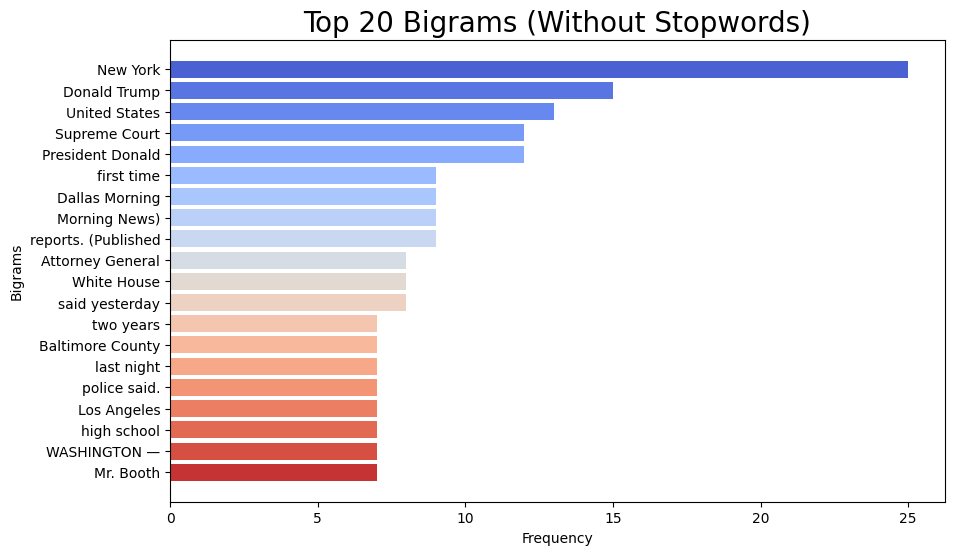

In [23]:
import numpy as np
import seaborn as sns

# Extract bigram labels and counts for the top-20 bigrams without stopwords
bigram_labels_no_stopwords, counts_no_stopwords = zip(*bigram_counts_no_stopwords.most_common(20))
bigram_labels_no_stopwords = [' '.join(bigram) for bigram in bigram_labels_no_stopwords]

# Create a color palette based on the counts
colors = sns.color_palette('coolwarm', len(counts_no_stopwords))

# Plot the horizontal bar chart with colors mapped to frequency
plt.figure(figsize=(10, 6))
bars = plt.barh(bigram_labels_no_stopwords, counts_no_stopwords, color=colors)

# Invert y-axis to display the most frequent bigrams at the top
plt.gca().invert_yaxis()

# Add titles and labels
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Top 20 Bigrams (Without Stopwords)', fontsize=20)

# Display the plot
plt.show()


# Exercise 4 - Comparing POS Taggers

In [14]:
import nltk
import stanza
import spacy
from termcolor import colored

# Download necessary models
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stanza.download('en')

# Load models
nlp_stanza = stanza.Pipeline('en')
nlp_spacy = spacy.load("en_core_web_sm")

# Input sentence
sentence = "Conor's dog's toy was hidden under the man's sofa in the woman's house"

# NLTK POS Tagging
nltk_tokens = nltk.word_tokenize(sentence)
nltk_pos = nltk.pos_tag(nltk_tokens)
print("\nNLTK POS Tags:")
for token in nltk_pos:
    print(token[0], colored(token[1], 'blue'))

# Stanza POS Tagging
stanza_doc = nlp_stanza(sentence)
print("\nStanza POS Tags:")
for sent in stanza_doc.sentences:
    for word in sent.words:
        print(word.text, colored(word.pos, 'blue'))

# SpaCy POS Tagging
spacy_doc = nlp_spacy(sentence)
print("\nSpaCy POS Tags:")
for token in spacy_doc:
    print(token.text, colored(token.pos_, 'blue'))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...
INFO:stanza:File exists: /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
/usr/local/lib/python3.10/dist-packages/stanza/models/tokenization/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytor


NLTK POS Tags:
Conor NNP
's POS
dog NN
's POS
toy NN
was VBD
hidden VBN
under IN
the DT
man NN
's POS
sofa NN
in IN
the DT
woman NN
's POS
house NN

Stanza POS Tags:
Conor PROPN
's PART
dog NOUN
's PART
toy NOUN
was AUX
hidden VERB
under ADP
the DET
man NOUN
's PART
sofa NOUN
in ADP
the DET
woman NOUN
's PART
house NOUN

SpaCy POS Tags:
Conor PROPN
's PART
dog NOUN
's PART
toy NOUN
was AUX
hidden VERB
under ADP
the DET
man NOUN
's PART
sofa NOUN
in ADP
the DET
woman NOUN
's PART
house NOUN


Explanation of the Code
NLTK POS Tagging:

The code uses the nltk.pos_tag() function to label each token in the sentence with its corresponding part of speech (POS).
The POS tags are displayed with color using termcolor for better readability.
Stanza POS Tagging:

The code downloads Stanza's English model (stanza.download('en')) and initializes the POS tagging pipeline.
It then applies the POS tagger on the input sentence and prints the tokens with their corresponding POS tags.
SpaCy POS Tagging:

The code loads the SpaCy model (spacy.load("en_core_web_sm")) and applies POS tagging to the sentence.
The output is formatted similarly to Stanza and NLTK for comparison purposes.


Analysis of the Output:
NLTK: Uses the Penn Treebank tagset. It identifies Conor as a NNP (Proper Noun), 's as a POS (Possessive ending), and dog as NN (Noun).

Stanza: Uses universal POS tags. It identifies Conor as PROPN (Proper Noun) and 's as PART (Particle). Stanza is slightly more modern with its tags.

SpaCy: Also uses universal POS tags like Stanza, showing similar results.

Conclusion:
NLTK is effective for basic POS tagging tasks but uses a more traditional tagset.
Stanza and SpaCy use universal POS tags, offering a more consistent tagging system across languages.
SpaCy is faster and more efficient, making it ideal for production environments, while Stanza offers deeper linguistic analysis, suitable for research purposes.

In [26]:
# Import necessary libraries
import nltk
import stanza
import spacy
from termcolor import colored

# Download NLTK's necessary models
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Initialize Stanza and SpaCy
stanza.download('en')
nlp_stanza = stanza.Pipeline('en')  # Stanza pipeline
nlp_spacy = spacy.load("en_core_web_sm")  # SpaCy pipeline

# Input sentence
string = "Conor’s dog’s toy was hidden under the man’s sofa in the woman’s house"

# NLTK POS tagging
print("------------ \\ NLTK \\ ------------")
nltk_words = nltk.word_tokenize(string)
nltk_pos = nltk.pos_tag(nltk_words)
for token in nltk_pos:
    print(token[0], colored(token[1], 'blue'))

# Stanza POS tagging
print("\n------------ \\ STANZA \\ ------------")
stanza_pos = nlp_stanza(string)
for sent in stanza_pos.sentences:
    for word in sent.words:
        print(word.text, colored(word.pos, 'blue'))

# SpaCy POS tagging
print("\n------------ \\ SpaCy \\ ------------")
spacy_pos = nlp_spacy(string)
for token in spacy_pos:
    print(token.text, colored(token.pos_, 'blue'))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...
INFO:stanza:File exists: /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
/usr/local/lib/python3.10/dist-packages/stanza/models/tokenization/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytor

------------ \ NLTK \ ------------
Conor NNP
’ NNP
s VBD
dog JJ
’ NNP
s NN
toy NN
was VBD
hidden VBN
under IN
the DT
man NN
’ VBZ
s JJ
sofa NN
in IN
the DT
woman NN
’ NNP
s NN
house NN

------------ \ STANZA \ ------------
Conor PROPN
’s PART
dog NOUN
’s PART
toy NOUN
was AUX
hidden VERB
under ADP
the DET
man NOUN
’s PART
sofa NOUN
in ADP
the DET
woman NOUN
’s PART
house NOUN

------------ \ SpaCy \ ------------
Conor PROPN
’s PART
dog NOUN
’s PART
toy NOUN
was AUX
hidden VERB
under ADP
the DET
man NOUN
’s PART
sofa NOUN
in ADP
the DET
woman NOUN
’s PART
house NOUN


Comparison of POS Taggers: NLTK, Stanza, and SpaCy
NLTK (Natural Language Toolkit):
NLTK is one of the oldest and most popular NLP libraries. It provides a simple interface to POS tagging using nltk.pos_tag(). While NLTK's POS tagging is straightforward and efficient for small tasks, it relies on the Penn Treebank tagset, which can sometimes produce less accurate results on more complex or ambiguous text. NLTK works well for educational purposes and lightweight NLP tasks, but it lacks the depth of linguistic processing that newer libraries like Stanza or SpaCy provide. NLTK is highly modular but can be slower compared to more modern libraries, especially when working with large datasets.

Stanza (Stanford NLP):
Stanza, developed by Stanford NLP, is a more advanced POS tagger built on deep learning models. It uses universal POS tags, which provide a more linguistically accurate tagging compared to NLTK. Stanza also supports multiple languages, making it versatile for international applications. Stanza’s POS tagging tends to be more accurate than NLTK because it’s built on neural network models trained on large, annotated datasets. In addition to POS tagging, Stanza offers a full NLP pipeline, including dependency parsing, named entity recognition (NER), and more. The deep learning approach, while more accurate, can make Stanza slower than SpaCy.

SpaCy:
SpaCy is a robust, fast, and production-ready NLP library. Like Stanza, SpaCy is built on neural networks and offers high accuracy with POS tagging. It uses universal POS tags, similar to Stanza, but is faster and optimized for real-time applications. SpaCy's POS tagging is particularly accurate for English and other major languages due to its large, pre-trained language models. SpaCy's main advantage lies in its speed and flexibility, with built-in support for tokenization, dependency parsing, named entity recognition (NER), and more. It's the most widely used library for industry applications due to its efficiency and scalability, which make it ideal for real-world NLP tasks.

Overall Comparison:
Accuracy: Stanza and SpaCy generally outperform NLTK in terms of accuracy due to their reliance on deep learning and larger datasets.
Speed: SpaCy is the fastest of the three, while Stanza can be slower but more linguistically accurate. NLTK is the slowest but suitable for smaller tasks.
Usability: SpaCy is the easiest to integrate into production environments, while NLTK is ideal for learning and academic use. Stanza is a middle ground between high accuracy and ease of use but is more suitable for research or applications requiring in-depth linguistic analysis.
In summary, while all three libraries serve the purpose of POS tagging, SpaCy is the best for industry-scale applications due to its speed and accuracy. Stanza excels in research settings where precision is key, and NLTK remains a good choice for educational purposes or lightweight tasks.